<a href="https://colab.research.google.com/github/RexGod/DataMining_Pgu_Nueral_Network/blob/main/finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

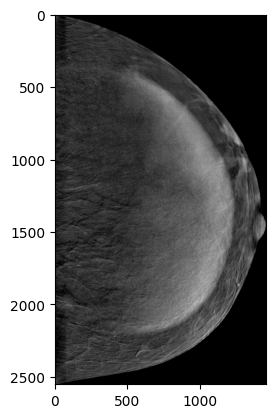

In [ ]:
pathImages = '/content/drive/MyDrive/Subtracted_images_of_CDD-CESM'
pathManual = '/content/drive/MyDrive/Radiology_manual_annotations.xlsx'
manualRadio = pd.read_excel(pathManual)
image = plt.imread('/content/drive/MyDrive/Subtracted_images_of_CDD-CESM/P101_L_CM_CC.jpg')
plt.imshow(image)
plt.show()


# New Section

In [ ]:
#image = cv2.imread('/content/drive/MyDrive/Subtracted_images_of_CDD-CESM/P100_L_CM_CC.jpg')
#width, height , rgb = np.array(image).shape
#print(height)

In [ ]:
manualRadio.head()

,Image_name,Patient_ID,Side,Type,Age,Breast density (ACR),BIRADS,Findings,View,Tags,Machine,Pathology Classification/ Follow up
0,P1_L_DM_MLO,1,L,DM,46,C,4,Architectural distortion,MLO,"suspicious, distortion",1,Malignant
1,P1_L_CM_MLO,1,L,CESM,46,_,4,Heterogenous non mass enhancement,MLO,"suspicious, non mass",1,Malignant
2,P2_R_DM_CC,2,R,DM,31,C,3$2,Multiple equal density masses$Benign macrocal...,CC,"benign, masses, macrocalcification",2,Benign
3,P2_R_DM_MLO,2,R,DM,31,C,3$2,Multiple equal density masses$Benign macrocalc...,MLO,"benign, masses, macrocalcification",2,Benign
4,P2_R_CM_CC,2,R,CESM,31,_,3,Multiple homogenously enhancing masses,CC,"benign, masses, homogenous",2,Benign


https://www.w3schools.com/python/pandas/pandas_analyzing.asp

In [ ]:
manualRadio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Image_name                           2006 non-null   object
 1   Patient_ID                           2006 non-null   int64 
 2   Side                                 2006 non-null   object
 3   Type                                 2006 non-null   object
 4   Age                                  2006 non-null   int64 
 5   Breast density (ACR)                 2006 non-null   object
 6   BIRADS                               2006 non-null   object
 7   Findings                             2006 non-null   object
 8   View                                 2006 non-null   object
 9   Tags                                 2006 non-null   object
 10  Machine                              2006 non-null   int64 
 11  Pathology Classification/ Follow up  2006 n

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

In [ ]:
manualRadio= manualRadio.rename(columns={'Pathology Classification/ Follow up':'classification'})

In [ ]:
manualRadio.head()

,Image_name,Patient_ID,Side,Type,Age,Breast density (ACR),BIRADS,Findings,View,Tags,Machine,classification
0,P1_L_DM_MLO,1,L,DM,46,C,4,Architectural distortion,MLO,"suspicious, distortion",1,Malignant
1,P1_L_CM_MLO,1,L,CESM,46,_,4,Heterogenous non mass enhancement,MLO,"suspicious, non mass",1,Malignant
2,P2_R_DM_CC,2,R,DM,31,C,3$2,Multiple equal density masses$Benign macrocal...,CC,"benign, masses, macrocalcification",2,Benign
3,P2_R_DM_MLO,2,R,DM,31,C,3$2,Multiple equal density masses$Benign macrocalc...,MLO,"benign, masses, macrocalcification",2,Benign
4,P2_R_CM_CC,2,R,CESM,31,_,3,Multiple homogenously enhancing masses,CC,"benign, masses, homogenous",2,Benign


In [ ]:
name_and_lable = manualRadio[["Image_name" , "classification"]]
name_and_lable.head()

,Image_name,classification
1,P1_L_CM_MLO,Malignant
4,P2_R_CM_CC,Benign
5,P2_R_CM_MLO,Benign
8,P2_L_CM_CC,Benign
9,P2_L_CM_MLO,Benign


In [ ]:
malignant_class = manualRadio.loc[manualRadio['classification']=='Malignant']
bengin_class = manualRadio.loc[manualRadio['classification'] == 'Bengin']
normal_class = manualRadio.loc[manualRadio['classification'] ==  'Normal']

In [ ]:
malignant_class.head()
#bengin_class = manualRadio.loc[manualRadio['classification'] == 'Bengin']
#normal_class = manualRadio.loc[manualRadio['classification'] ==  'Normal']

,Image_name,Patient_ID,Side,Type,Age,Breast density (ACR),BIRADS,Findings,View,Tags,Machine,classification
0,P1_L_DM_MLO,1,L,DM,46,C,4,Architectural distortion,MLO,"suspicious, distortion",1,Malignant
1,P1_L_CM_MLO,1,L,CESM,46,_,4,Heterogenous non mass enhancement,MLO,"suspicious, non mass",1,Malignant
10,P3_L_DM_CC,3,L,DM,45,C,5,High density mass with speculated margin,CC,"malignant, mass, speculated",1,Malignant
11,P3_L_DM_MLO,3,L,DM,45,C,5,High density mass with speculated margin,MLO,"malignant, mass, speculated",1,Malignant
12,P3_L_CM_CC,3,L,CESM,45,_,5,Heterogenously enhancing mass with speculated ...,CC,"malignant, mass, speculated",1,Malignant


**Pre - Proccessing For images**

In [ ]:
import os

In [ ]:
images = os.listdir(pathImages)
loaded_images = []
for filename in images:
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_list = plt.imread(os.path.join(pathImages, filename))
        loaded_images.append(image_list)

In [ ]:
len(loaded_images)

1003

In [ ]:
print(manualRadio.count())

Image_name              1003
Patient_ID              1003
Side                    1003
Type                    1003
Age                     1003
Breast density (ACR)    1003
BIRADS                  1003
Findings                1003
View                    1003
Tags                    1003
Machine                 1003
classification          1003
dtype: int64


In [ ]:
manualRadio = manualRadio[manualRadio['Type']=='CESM']
manualRadio.count()

Image_name                             1003
Patient_ID                             1003
Side                                   1003
Type                                   1003
Age                                    1003
Breast density (ACR)                   1003
BIRADS                                 1003
Findings                               1003
View                                   1003
Tags                                   1003
Machine                                1003
Pathology Classification/ Follow up    1003
dtype: int64

In [ ]:
manualRadio.head()

,Image_name,Patient_ID,Side,Type,Age,Breast density (ACR),BIRADS,Findings,View,Tags,Machine,classification
1,P1_L_CM_MLO,1,L,CESM,46,_,4,Heterogenous non mass enhancement,MLO,"suspicious, non mass",1,Malignant
4,P2_R_CM_CC,2,R,CESM,31,_,3,Multiple homogenously enhancing masses,CC,"benign, masses, homogenous",2,Benign
5,P2_R_CM_MLO,2,R,CESM,31,_,3,Multiple homogenously enhancing masses,MLO,"benign, masses, homogenous",2,Benign
8,P2_L_CM_CC,2,L,CESM,31,_,2,Flap with no enhancement,CC,"flap, benign",2,Benign
9,P2_L_CM_MLO,2,L,CESM,31,_,2,Flap with no enhancement,MLO,"flap, benign",2,Benign


In [ ]:
train_data_size = int(len(loaded_images)*0.75)
validation_data_size = int(len(loaded_images)*0.12)
test_data_size = int(len(loaded_images)*0.13)

In [ ]:
random_select = np.random.choice(len(loaded_images), size=train_data_size, replace=False)

In [ ]:
train_data_x = np.array(loaded_images)[random_select]
train_data_y = np.array(manualRadio)[random_select]

<ipython-input-40-90dbeb777ef5>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_data_x = np.array(loaded_images)[random_select]


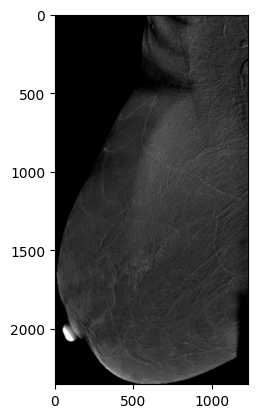

In [ ]:
img=train_data_x[1]
plt.imshow(img)

In [ ]:
train_data_y[1]

array(['P134_R_CM_MLO', 134, 'R', 'CESM', 67, '_', 5,
       'Heterogenously enhancing mass with speculated margin and surrounding satellites',
       'MLO', 'malignant mass, speculated, multifocal', 1, 'Malignant'],
      dtype=object)